In [1]:
import tensorflow as tf
import numpy as np
from keras.applications import vgg16, inception_v3, resnet50, mobilenet
 
#Load the VGG model
vgg_model = vgg16.VGG16(weights='imagenet')
 
#Load the Inception_V3 model
inception_model = inception_v3.InceptionV3(weights='imagenet')
 
#Load the ResNet50 model
resnet_model = resnet50.ResNet50(weights='imagenet')

Instructions for updating:
Colocations handled automatically by placer.


Using TensorFlow backend.


PIL image size (224, 224)


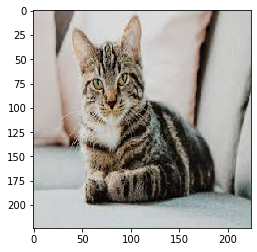

numpy array size (224, 224, 3)


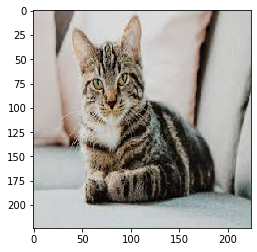

image batch size (1, 224, 224, 3)


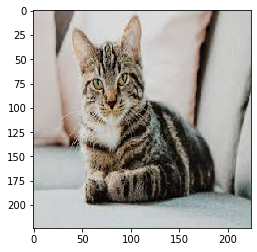

In [2]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
%matplotlib inline
 
filename = 'cat1.jpg'
# load an image in PIL format
original = load_img(filename, target_size=(224, 224))
print('PIL image size',original.size)
plt.imshow(original)
plt.show()
 
# convert the PIL image to a numpy array
# IN PIL - image is in (width, height, channel)
# In Numpy - image is in (height, width, channel)
numpy_image = img_to_array(original)
print('numpy array size',numpy_image.shape)
plt.imshow(np.uint8(numpy_image))
plt.show()


# Convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# We want the input matrix to the network to be of the form (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

In [3]:
# prepare the image for the VGG model
processed_image = vgg16.preprocess_input(image_batch.copy())
 
# get the predicted probabilities for each class
predictions = vgg_model.predict(processed_image)
# print predictions
 
# convert the probabilities to class labels
# We will get top 5 predictions which is the default
label_vgg = decode_predictions(predictions)
label_vgg

[[('n02123045', 'tabby', 0.5117699),
  ('n02123159', 'tiger_cat', 0.28183135),
  ('n02124075', 'Egyptian_cat', 0.15845835),
  ('n04040759', 'radiator', 0.0066081826),
  ('n04522168', 'vase', 0.0049373778)]]

In [4]:
# prepare the image for the ResNet50 model
processed_image = resnet50.preprocess_input(image_batch.copy())

# get the predicted probabilities for each class
predictions = resnet_model.predict(processed_image)

# convert the probabilities to class labels
# If you want to see the top 3 predictions, specify it using the top argument
label_resnet = decode_predictions(predictions, top=3)
label_resnet

[[('n02123045', 'tabby', 0.7175769),
  ('n02123159', 'tiger_cat', 0.16382954),
  ('n02124075', 'Egyptian_cat', 0.058884438)]]

In [5]:
# load an image in PIL format
original = load_img(filename, target_size=(299, 299))

# Convert the PIL image into numpy array
numpy_image = img_to_array(original)

# reshape data in terms of batchsize
image_batch = np.expand_dims(numpy_image, axis=0)

# prepare the image for the Inception model
processed_image = inception_v3.preprocess_input(image_batch.copy())

# get the predicted probabilities for each class
predictions = inception_model.predict(processed_image)

# convert the probabilities to class labels
label_inception = decode_predictions(predictions)
label_inception


[[('n02123045', 'tabby', 0.8003171),
  ('n02123159', 'tiger_cat', 0.1625101),
  ('n02124075', 'Egyptian_cat', 0.01604031),
  ('n02127052', 'lynx', 0.00080410513),
  ('n02129604', 'tiger', 0.0006308268)]]

In [10]:
import cv2
numpy_image = np.uint8(img_to_array(original)).copy()
numpy_image = cv2.resize(numpy_image,(900,900))

cv2.putText(numpy_image, "VGG16: {}, {:.2f}".format(label_vgg[0][0][1], label_vgg[0][0][2]) , (350, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
cv2.putText(numpy_image, "Inception: {}, {:.2f}".format(label_inception[0][0][1], label_inception[0][0][2]) , (350, 110), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
cv2.putText(numpy_image, "ResNet50: {}, {:.2f}".format(label_resnet[0][0][1], label_resnet[0][0][2]) , (350, 145), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
# numpy_image = cv2.resize(numpy_image, (700,700))
# cv2.imwrite("images/{}_output.jpg".format(filename.split('/')[-1].split('.')[0]),cv2.cvtColor(numpy_image, cv2.COLOR_RGB2BGR))

array([[[206, 198, 196],
        [206, 198, 196],
        [206, 198, 196],
        ...,
        [198, 199, 194],
        [198, 199, 194],
        [198, 199, 194]],

       [[206, 198, 196],
        [206, 198, 196],
        [206, 198, 196],
        ...,
        [198, 199, 194],
        [198, 199, 194],
        [198, 199, 194]],

       [[206, 198, 196],
        [206, 198, 196],
        [206, 198, 196],
        ...,
        [198, 199, 194],
        [198, 199, 194],
        [198, 199, 194]],

       ...,

       [[203, 207, 208],
        [203, 207, 208],
        [202, 207, 208],
        ...,
        [176, 190, 191],
        [176, 190, 191],
        [176, 190, 191]],

       [[203, 207, 208],
        [203, 207, 208],
        [203, 207, 208],
        ...,
        [176, 190, 191],
        [176, 190, 191],
        [176, 190, 191]],

       [[203, 207, 208],
        [203, 207, 208],
        [202, 207, 208],
        ...,
        [176, 190, 191],
        [176, 190, 191],
        [176, 190, 191]]

(-0.5, 899.5, 899.5, -0.5)

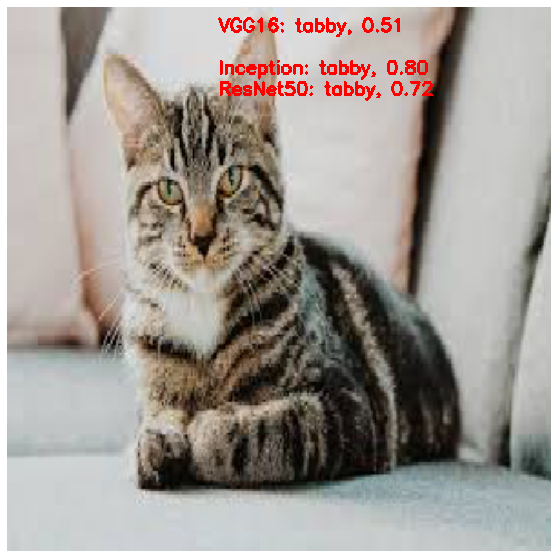

In [14]:
plt.figure(figsize=[10,10])
plt.imshow(numpy_image)
plt.axis('off')